<a href="https://colab.research.google.com/github/ChoYeongjo/book-pytorch-ai-app-practice/blob/main/250908_book_AI_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip list

Package                               Version
------------------------------------- ------------------
absl-py                               1.4.0
absolufy-imports                      0.3.1
accelerate                            1.10.1
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.12.15
aiosignal                             1.4.0
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.2
alembic                               1.16.5
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.10.0
anywidget                             0.9.18
argon2-cffi                           25.1.0
argon2-cffi-bindings                  25.1.0
array_record                          0.8.1
arrow 

In [2]:
!pwd

/content


In [3]:
import torch

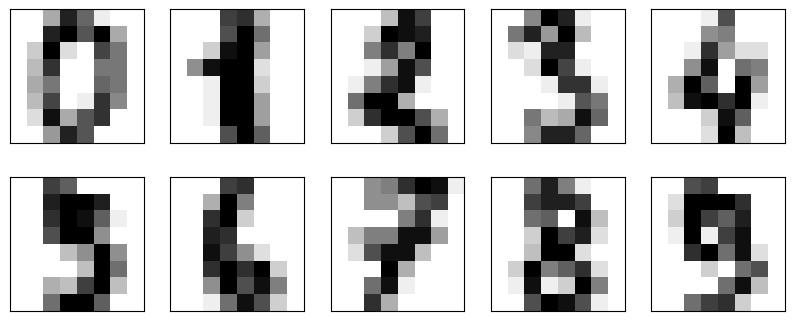

데이터의 형태:  (1797, 64)
레이블의 형태:  [0 1 2 3 4 5 6 7 8 9]


In [28]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits_data=datasets.load_digits()

n_img=10
plt.figure(figsize=(10,4))
for i in range(n_img):
  ax=plt.subplot(2,5,i+1)
  ax.imshow(digits_data.data[i].reshape(8,8), cmap='gray_r')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

print("데이터의 형태: ",digits_data.data.shape)
print("레이블의 형태: ",digits_data.target[:n_img])

In [29]:
import torch
from sklearn.model_selection import train_test_split

digit_images=digits_data.data
lables=digits_data.target

X_train, X_test, y_train, y_test=train_test_split(digit_images, lables)

In [30]:
X_train.shape, X_train.dtype, type(X_train)

((1347, 64), dtype('float64'), numpy.ndarray)

In [31]:
X_train=torch.tensor(X_train, dtype=torch.float32)
y_train=torch.tensor(y_train, dtype=torch.int64)
X_test=torch.tensor(X_test, dtype=torch.float32)
y_test=torch.tensor(y_test, dtype=torch.int64)

In [32]:
from torch import nn
net=nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
)
print(net)

Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)


In [33]:
from torch import optim
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(), lr=0.01)

record_loss_train=[]
record_loss_test=[]

for i in range(1000):
  optimizer.zero_grad()

  #순전파
  y_pred_train=net(X_train)
  y_pred_test=net(X_test)

  # 오차 기록 및 계산
  loss_train=loss_fn(y_pred_train, y_train)
  loss_test=loss_fn(y_pred_test, y_test)
  record_loss_train.append(loss_train.item())
  record_loss_test.append(loss_test.item())

  #역전파
  loss_train.backward()
  #파라미터 갱신
  optimizer.step()

  if i%200==0:
    print(f"Epoch: {i}, Loss_Train: {loss_train.item():.3f}, Loss_Test:{loss_test.item():.3f}")

Epoch: 0, Loss_Train: 2.413, Loss_Test:2.429
Epoch: 200, Loss_Train: 0.491, Loss_Test:0.546
Epoch: 400, Loss_Train: 0.218, Loss_Test:0.282
Epoch: 600, Loss_Train: 0.145, Loss_Test:0.221
Epoch: 800, Loss_Train: 0.108, Loss_Test:0.197
